                          IMPORTING REQUIRED LIBRARIES








In [24]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
from keras.utils.np_utils import to_categorical

                          DATA LOADING

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

                          PRINT SHAPE OF THE DATA SET



In [26]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000,)
(10000, 28, 28)


                          RESHAPING DATA SET

In [27]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

                         PRINT RESHAPED DATASET

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


                          PRINT FIRST 30 IMAGES

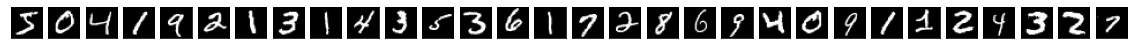

In [29]:
import matplotlib.pyplot as plt

n = 30  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


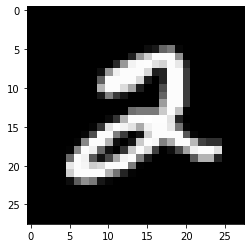

In [30]:
XX_train = x_train.astype('float32') / 255.
XX_test = x_test.astype('float32') / 255.
plt.imshow(XX_train[5].reshape(28,28))

                      ONE HOT ENCODING FOR 10 CLASSES



In [31]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = to_categorical(y_train, num_classes=10).T
Y_test = to_categorical(y_test, num_classes=10).T

In [32]:
print(XX_train.shape)
print(Y_train.shape)
print(XX_test.shape)
print(Y_test.shape)



(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


                      SOFTMAX FUNCTION

In [33]:
def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis=0, keepdims=True)

                      INITIALIZE PARAMETERS

In [34]:
def initialize_param(d):
  np.random.seed(1)
  w = np.random.randn(d,10)/np.sqrt(d)
  b = np.zeros((10,1))
  params = {"w": w,"b": b}
  return params


                        FORWARD PASS

In [35]:
def forward(params,X,Y):
  w = params["w"]
  b = params["b"]
  m = X.shape[1]
  A = softmax(np.dot(w.T,X) + b)
  cost = (-1/m)*np.sum(Y * np.log(A + 1e-9))
  return A,cost

                        BACK PROPOGATION

In [36]:
def backprop(X,Y,A):
  m = X.shape[1]
  dw = (1 / m) * np.dot(X,(A-Y).T)
  db = (1 / m) * np.sum(A - Y)

  return dw, db

                        OPTIMIZATION

In [37]:
def optimize(params, X, Y, num_iterations, l_rate):

  w = params["w"]
  b = params["b"]

  costs = []
  for i in range(num_iterations):
    A,cost = forward(params,X,Y)
    dw,db = backprop(X,Y,A)

    params["w"] = params["w"] - l_rate * dw
    params["b"] = params["b"] - l_rate * db
    if (i%100==0):
      print('Cost on {} interation: Cost: {}, Normalised Weight: {}, Bias: {}'.format(i, cost, np.linalg.norm(dw), db))
    costs.append(cost)
  return params,costs


                        PREDICTION FUNCTION

In [38]:
def predict(params,X,Y):
  w = params["w"]
  print(w.shape,X.shape)
  b = params["b"]
  m = X.shape[1]
  A = softmax(np.dot(w.T,X)+b)
  y_hat = np.argmax(A, axis=0)
  Y = np.argmax(Y, axis=0)
  accuracy = (y_hat == Y).mean()
  return accuracy * 100

                        MODEL FUNCTION

In [39]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, learning_rate):
        params = initialize_param(d)
        print(params["w"].shape,"Parameter Weight Shape")
        params,costs = optimize(params, X_train, Y_train, num_iter, learning_rate)
        return params,costs



                      TRAINING AND TESTING THE MODEL

In [59]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 2000, 0.3)

(784, 10) Parameter Weight Shape
Cost on 0 interation: Cost: 2.4364883345231814, Normalised Weight: 1.1366058666201924, Bias: -2.8776980798284056e-17
Cost on 100 interation: Cost: 0.4439192683711343, Normalised Weight: 0.0590183839375736, Bias: -8.289665250534502e-19
Cost on 200 interation: Cost: 0.38412602267703727, Normalised Weight: 0.034254895887607134, Bias: 5.033011044967377e-19
Cost on 300 interation: Cost: 0.3583862263620628, Normalised Weight: 0.025157842337116848, Bias: -1.4802973661668755e-18
Cost on 400 interation: Cost: 0.3431129756871708, Normalised Weight: 0.020273963550972832, Bias: 1.0954200509634879e-18
Cost on 500 interation: Cost: 0.3326786461716981, Normalised Weight: 0.017170972963761476, Bias: -8.881784197001253e-19
Cost on 600 interation: Cost: 0.3249543314893982, Normalised Weight: 0.015002065471736931, Bias: 5.329070518200752e-19
Cost on 700 interation: Cost: 0.3189294567068399, Normalised Weight: 0.013390342427504127, Bias: 1.0362081563168129e-18
Cost on 800 

                      PRINT TRAINING AND TESTING ACCURACY

In [60]:
print("Train Accuracy: ",predict(params, XX_train, Y_train))
print("Test Accuracy: ",predict(params, XX_test, Y_test))

(784, 10) (784, 60000)
Train Accuracy:  92.02166666666668
(784, 10) (784, 10000)
Test Accuracy:  92.05


                       PLOTTING

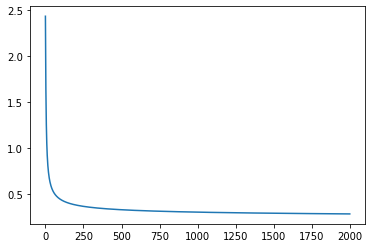

In [61]:
plt.plot(range(len(costs)),costs)